# Generating Dataset

*   From Campridge University .xml dataset
*   Each .xml file contains data about a student's test
*   Information extracted from each .xml file:
    *   document name
    *   student response
    *   number of mistakes
    *   the mistakes themselves
    *   the corrections
    *   correction codes
    *   answer score


<div>
<img src="xml_example.png", alt="oops", style="width: 800px;", align="center"/>
</div>

In [2]:
# take care of some imports for this section of the notebook

from lxml import etree
import pandas as pd
import re
from My_Functions import parse_xml
import os
import glob
import pandas as pd

# changing directory into the one that contains our .xml files
os.chdir('/Users/drios/Thinkful/Final_Capstone/XML_Files/Compiled/')

# create a list of the xml files we want to parse for dataset generation
list_of_xml_files = os.listdir()

# let's confirm the first .xml file name, we can compare against the Jupyter local folder
list_of_xml_files[0]

'doc2485.xml'

Dataframes generated by iterating through the available .xml files and parsing them for the student answer data using a ```parse_xml()``` function created in another notebok.

In [3]:
# here we generate a list to create a dataframe

dataframe_list = []  # start with empty list
for xml_file in list_of_xml_files:
    dataframe_list.append(parse_xml(
        "{}".format(xml_file), 1))  # parse_xml() is a function created in a
    # separate notebook, it takes an xml file from the FCE dataset and grabs
    # a student's answer data for one question, note the number as the second argument

fce_df_answer_1 = pd.DataFrame(dataframe_list)
column_headers = [
    "Document_Name", "Response", "Mistakes", "Number_of_Mistakes",
    "Corrections", "Correction_Codes", "Answer_Score"
]
fce_df_answer_1.columns = column_headers

# check it out
print("fce_df_answer_1")
fce_df_answer_1

fce_df_answer_1


,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
0,doc2485.xml,Dear Helen I have received your letter which m...,"[., is, make, The, attempt, invite, holidy, , ...",20,"[,, ,, makes, For the, a, take you up on, invi...","[RP, MP, UV, AGV, MT, MD, RV, L, MV, S, RP, MD...",2.3
1,doc1832.xml,"Dear Sir, Last week I London for . During my s...","[stayed in, holidays, show, was, see, diferent...",15,"[went to, a, holiday, were, seeing, different,...","[RV, MD, AGN, UN, AGV, FV, S, FV, IV, R, UP, F...",3.2
2,doc426.xml,Dear Helen Ryan: I am writing to answer the qu...,"[to, an other, august, rather, log cabins, its...",12,"[another, August, a, log cabin, it's, options,...","[UT, RP, RP, UV, MD, AGN, MP, R, RV, W, S, RJ, S]",4.3
3,doc1826.xml,"Dear Sir, I'm writing to you to complain about...","[None, deceiveful, it, into, character, of, ad...",25,"[deceitful, disappointing, actor, advertising,...","[RJ, DJ, UA, UT, RN, UT, RV, UT, S, R, RN, UJ,...",4.3
4,doc1198.xml,"Dear Sir or Madam, I am writing to complain ab...","[musical, which, it, didn't make us happy, Non...",33,"[the, of, what, went wrong, theater, theatre, ...","[UJ, MD, MT, RA, UA, R, SA, S, M, FV, RD, UY, ...",3.2
...,...,...,...,...,...,...,...
1239,doc2311.xml,"June 17th, 2000 Dear Sir, I am writing this le...","[whom, am I, starring, of, will, started, enit...",10,"[how, I am, ,, acting, for, would, start, it, ...","[R, W, MP, RV, RT, TV, FV, MA, MD, DV, RJ, S, RV]",3.1
1240,doc2305.xml,"Dear Mr Robertson, Thank you for effort which ...","[your, ,, three days, programm, advertisment, ...",10,"[the, three-day, programme, ,, concerning, adv...","[RD, UP, DJ, S, MP, MT, S, MD, MP, S, RJ, UY, ...",4.3
1241,doc2463.xml,To the manger of the Circle Theatre Mr Smith C...,"[a, trip, free-time, for, different, informati...",18,"[free time, information, ,, ,, tourists, parts...","[UD, UN, UP, UT, UJ, CN, MP, MP, UD, AGN, AGN,...",2.3T
1242,doc365.xml,"Dear Mr Brown, I went to the Circle Theatre ye...","[got, only, sign, What, quite not, it, no, dif...",17,"[was, That, not quite, one, ,, No, contrary, t...","[RV, UY, UN, RA, W, RA, MP, RP, RY, RT, UN, RA...",4.2


In [4]:
# now for the 2nd answer

dataframe_list = []  # start with empty list
for xml_file in list_of_xml_files:
    dataframe_list.append(parse_xml("{}".format(xml_file),
                                    2))  # here it is! answer 2!

fce_df_answer_2 = pd.DataFrame(dataframe_list)
column_headers = [
    "Document_Name", "Response", "Mistakes", "Number_of_Mistakes",
    "Corrections", "Correction_Codes", "Answer_Score"
]
fce_df_answer_2.columns = column_headers

# check it out
print("fce_df_answer_2")
fce_df_answer_2

fce_df_answer_2


,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
0,doc2485.xml,Shopping is part of our life. I don't like sho...,"[imagene, friday, ., of the, pay, friday, to, ...",32,"[imagine, Friday, ?, paid, Friday, in, queues,...","[RV, S, RP, RP, U, TV, RP, UT, RT, UD, FN, AS,...",2.2
1,doc1832.xml,"Unfortunately, Pat wasn't very good at keeping...","[in, cost, bath, whether, out, taking a sunbat...",15,"[on, coast, swim, weather, sunbathing, As, go,...","[RT, RN, RN, SX, UY, DV, RT, RV, SX, L, RT, RV...",3.1
2,doc426.xml,Dear Kim: How are you? I'm fine. I finish scho...,"[it, He's, handsom, lights of the stage, becau...",11,"[It, he's, handsome, stage lights, and, had, l...","[RP, RP, S, W, RC, TV, RV, R, MY, MP, RT, DD]",4.3
3,doc1826.xml,"Unfortunately, Pat wasn't very good at keeping...","[extremly, pacefully, run, explain, harder, he...",23,"[extremely, peacefully, ,, ran, tell, hard, hi...","[DY, S, MP, TV, RV, FY, RD, RV, RD, RN, FV, RV...",5.1
4,doc1198.xml,People who in the city use lots of technologic...,"[,, lives, ,, life style, easy, more fast, the...",41,"[live, lifestyle, easier, and, faster, twenty-...","[UP, AGV, UP, RP, FJ, MC, IJ, R, UD, MP, MP, U...",3.2
...,...,...,...,...,...,...,...
1239,doc2311.xml,Modern technology been changing human life sin...,"[have, the, many, eletricity, than, t.v., , wh...",14,"[has, man, electricity, then, TV, . When, mill...","[AGV, UD, R, S, SX, RP, RP, S, RP, MP, UD, RV,...",3.2
1240,doc2305.xml,"The Home of the Future Dear Reader, I have dec...","[obey, ,, every thing, furiture, programm, jus...",13,"[our, respond, everything, furniture, programm...","[MD, RV, UP, RP, S, S, W, RT, MD, MV, RN, CL, ...",5.1
1241,doc2463.xml,How modern technology changed your daily life!...,"[place, since, TV, None, washing-machine, avai...",20,"[importance, in, beginning of, ,, TVs, washing...","[RN, RT, MN, MP, FN, FN, UP, FJ, MP, S, MN, MP...",3.3
1242,doc365.xml,How has modern technology changed your daily l...,"[had a gigantic improvement, all became, invol...",17,"[has improved gigantically, have all become, i...","[AS, TV, AGV, MD, RD, RA, S, UD, AGV, FN, AGA,...",3.3


The two DataFrames are merged into one below, totaling 2,488 answers from 1,244 students.

In [5]:
# append the two dataframes together

fce_df = fce_df_answer_1.append(fce_df_answer_2).reset_index(drop=True)
print("fce_df")
fce_df

fce_df


,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
0,doc2485.xml,Dear Helen I have received your letter which m...,"[., is, make, The, attempt, invite, holidy, , ...",20,"[,, ,, makes, For the, a, take you up on, invi...","[RP, MP, UV, AGV, MT, MD, RV, L, MV, S, RP, MD...",2.3
1,doc1832.xml,"Dear Sir, Last week I London for . During my s...","[stayed in, holidays, show, was, see, diferent...",15,"[went to, a, holiday, were, seeing, different,...","[RV, MD, AGN, UN, AGV, FV, S, FV, IV, R, UP, F...",3.2
2,doc426.xml,Dear Helen Ryan: I am writing to answer the qu...,"[to, an other, august, rather, log cabins, its...",12,"[another, August, a, log cabin, it's, options,...","[UT, RP, RP, UV, MD, AGN, MP, R, RV, W, S, RJ, S]",4.3
3,doc1826.xml,"Dear Sir, I'm writing to you to complain about...","[None, deceiveful, it, into, character, of, ad...",25,"[deceitful, disappointing, actor, advertising,...","[RJ, DJ, UA, UT, RN, UT, RV, UT, S, R, RN, UJ,...",4.3
4,doc1198.xml,"Dear Sir or Madam, I am writing to complain ab...","[musical, which, it, didn't make us happy, Non...",33,"[the, of, what, went wrong, theater, theatre, ...","[UJ, MD, MT, RA, UA, R, SA, S, M, FV, RD, UY, ...",3.2
...,...,...,...,...,...,...,...
2483,doc2311.xml,Modern technology been changing human life sin...,"[have, the, many, eletricity, than, t.v., , wh...",14,"[has, man, electricity, then, TV, . When, mill...","[AGV, UD, R, S, SX, RP, RP, S, RP, MP, UD, RV,...",3.2
2484,doc2305.xml,"The Home of the Future Dear Reader, I have dec...","[obey, ,, every thing, furiture, programm, jus...",13,"[our, respond, everything, furniture, programm...","[MD, RV, UP, RP, S, S, W, RT, MD, MV, RN, CL, ...",5.1
2485,doc2463.xml,How modern technology changed your daily life!...,"[place, since, TV, None, washing-machine, avai...",20,"[importance, in, beginning of, ,, TVs, washing...","[RN, RT, MN, MP, FN, FN, UP, FJ, MP, S, MN, MP...",3.3
2486,doc365.xml,How has modern technology changed your daily l...,"[had a gigantic improvement, all became, invol...",17,"[has improved gigantically, have all become, i...","[AS, TV, AGV, MD, RD, RA, S, UD, AGV, FN, AGA,...",3.3


# Text Preprocessing

An overview of the text/numerical cleaning and spacy-features engineered from the answer text.

## Initial Cleaning

An overview of the starting variables are below. None of them quite need cleaning yet due to the nature of this project, but the score that the student responses received does have some issues.
* Student response
    * Consists only of words and punctuation used correctly by the student
    * Cleaning not needed
* Mistakes
    * List of the words and punctuation used incorrectly
    * Used to derive the next variable
    * Cleaning not needed
* Number of mistakes
    * A simple count
    * Cleaning not needed
* Corrections
    * List of words and punctuation that would replace the mistakes
    * Cleaning not needed (not going to separate)
* Correction codes
    * List of the codes that represent the grammatical mistakes
        * Assigned by the graders of the student responses
    * Cleaning done after separating later
* Answer score
    * There seems to be some values that are not numerical
    * Explored and addressed in this section

**Note:** Treatment of outliers in numerical variables is considered later, after the original spacy features are derived from the student responses.

### Checking out the Answer Scores

* Characters that are not numerical or raise a question
* For each of these characters I go back to the .xml file and look into why it could be "weird"
* Unfortunately, the research I got the .xml files from doesn't go in-depth as to explain what all of the answer scores mean, so I really only have the .xml files to go off of

In [6]:
list(fce_df.Answer_Score.unique())

['2.3',
 '3.2',
 '4.3',
 '3.1',
 '3.3',
 '4.1',
 '2.3T',
 '4.2',
 '5.2',
 '5.1',
 '2.2',
 '5.3',
 '.2',
 '2.1',
 '1.3',
 'S',
 '1.1',
 '1.2',
 0,
 '0',
 '2.',
 '.1',
 '1',
 '5/1']

In [7]:
fce_df.Answer_Score.value_counts()

3.3     341
3.2     325
3.1     295
4.1     257
4.2     209
4.3     200
5.1     184
2.3     167
2.3T    132
2.2     107
5.2      91
5.3      52
2.1      50
1.3      32
0        15
1.2      13
0         5
S         4
1.1       3
.2        2
5/1       1
1         1
.1        1
2.        1
Name: Answer_Score, dtype: int64

As can be seen in the cells above, there exist several characters that are not numerical or raise questions. They're listed here and explored further in the rest of this section.

* 2.3T
* 0 and 0 (one is a string and one is an int)
* S
* .2
* 5/1
* .1
* 2.
* 1

In [8]:
# create a function that will create a subDataFrame
def create_df(weird_value):
    weird_value_df = fce_df[fce_df["Answer_Score"] == "{}".format(weird_value)]
    return weird_value_df   

# drop rows with no answer scores
no_scores_df = fce_df[fce_df.isna().any(axis=1)]

fce_df = fce_df.drop(no_scores_df.index).reset_index(drop=True)

#### 2.3T

* 132 total
* Removed the "T" and treated as 2.3

In [9]:
two_point_three_T_df = create_df("2.3T")

two_point_three_T_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
11,doc383.xml,"Dear Sir or Madam, I'm to you to complain abou...","[writting, theatre, for me very disappointing,...",25,"[writing, very disappointing for me, ., absenc...","[IV, UN, W, RP, DN, MT, FV, SX, RJ, CN, RT, UP...",2.3T
36,doc1775.xml,"17.06.2000 Hello Sir, "" very that I have to wr...","[Um, unpleased, in, Theater, points, because, ...",20,"[I'm, unhappy, at, Theatre, ,, reasons, why, a...","[S, RJ, RT, SA, MP, RN, R, UP, RV, AGD, SA, RN...",2.3T
44,doc553.xml,"Dear Mr Robertson, On behalf of our class I wo...","[,, indeed, about, for, change, suitable, unti...",20,"[in, for, the, the, on, chance, compatible, by...","[UP, MT, UY, RT, MD, MD, R, MT, UT, RN, RJ, RT...",2.3T
47,doc2296.xml,Dear I'm writing you about musical show that I...,"[Mr/, in, complain, ,, None, have visited, wee...",13,"[Sir/Madam, to, to complain, the, visited, wen...","[RN, S, MT, UT, FV, MD, UP, RV, TV, MP, R, FJ,...",2.3T
48,doc547.xml,"12.12.2000 Dear Mr Robertson, I am writing to ...","[greatful, to go, its, in, on, is, make up, or...",15,"[grateful, go, to, in, an, at, at, the, will b...","[S, FV, MT, MT, RD, RT, MT, UT, MD, TV, MD, MD...",2.3T
...,...,...,...,...,...,...,...
2273,doc772.xml,"Unfortunately, Pat wasn't very good at keeping...","[explain, chose, companions of class, and, alw...",21,"[tell, chosen, classmates, was, was always, pr...","[RV, TV, DN, UC, W, AGV, IV, RV, R, IV, UD, UD...",2.3T
2309,doc2049.xml,Last week I had planned to change my old baske...,"[a , corect, outdoor, visited, during, . The, ...",15,"[correct, the right, outdoors, in, looked arou...","[RJ, S, L, DY, MT, RV, MD, RT, RP, MP, RA, UA,...",2.3T
2327,doc405.xml,How has modern technology changed your daily l...,"[has, before, can, In, . The, human, we, be co...",20,"[have, back, to, ago, could, As, , the, humans...","[AGV, MY, MT, RY, TV, R, RT, RP, FN, RA, RV, R...",2.3T
2457,doc1234.xml,"""THE RIGHT PERSON"" MAY 29, 1997. IT WAS MY FIR...","[CLOUSE, VERY WELL THE AREA, IN, COURNER, HOUS...",32,"[,, ,, NUMBER, CLOSE, THE AREA VERY WELL, THE,...","[MP, MP, MN, S, W, MD, RT, S, RN, RC, RN, RP, ...",2.3T


In [10]:
# replace the T values with a blank
fce_df["Answer_Score"] = fce_df["Answer_Score"].str.replace("T", "")

#### 0

* Two 0-values
    * 20 total records
    * One is a string and the other an int
* String 0
    * May actually represent a score of zero
    * There are only five of them
    * Removed
* Int 0
    * Answer scores are missing from their .xml files
    * Removed

In [11]:
# create the DataFrames of records that have these values
string_zero_df = create_df("0")
int_zero_df = fce_df[fce_df["Answer_Score"] == 0]

In [12]:
string_zero_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
1143,doc1586.xml,Dear Mr Robertson you. I need some . Because m...,"[I'm sorry about writing, the, Letter, None, F...",59,"[I'm sorry to have to write, this, letter, for...","[ID, RD, RP, RT, RP, W, MD, UT, M, RT, MC, AGN...",0
1440,doc541.xml,"Basle, 12th 2000 Dar Oxana, Thanks for your le...","[Decembre, wheter, it, social life, politic, i...",14,"[December, whether, the, them, the, society, p...","[S, S, MD, AGA, RY, MD, RN, RJ, RT, RV, RV, SX...",0
1553,doc2394.xml,Best Detective Stories of Agatha Christie - A...,"[always was, or, caracthers, or, decieving, wo...",17,"[The, has always been, and, characters, and, d...","[MD, TV, RC, S, RC, R, S, AGN, ID, RV, S, R, S...",0
1629,doc444.xml,"Dear Kim: I am sorry, I haven't written you bu...","[soon, for, the, on, ,, ""of, wheel, None, rep...",20,"[to, sooner, am, about, ,, ,, in, ., , ""Of, re...","[MT, FY, MV, RT, UD, MP, MP, RT, RP, RP, UN, F...",0
2387,doc1586.xml,"In my college It was dangerous, but I knew I h...","[tall, someting, got, None, buillding, got, al...",15,"[tell, something, have got, building, building...","[R, SX, S, CE, CE, RV, AGN, S, RV, RP, AGN, AG...",0


In [13]:
int_zero_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score


In [14]:
zero_df = string_zero_df.append(int_zero_df)

In [15]:
zero_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
1143,doc1586.xml,Dear Mr Robertson you. I need some . Because m...,"[I'm sorry about writing, the, Letter, None, F...",59,"[I'm sorry to have to write, this, letter, for...","[ID, RD, RP, RT, RP, W, MD, UT, M, RT, MC, AGN...",0
1440,doc541.xml,"Basle, 12th 2000 Dar Oxana, Thanks for your le...","[Decembre, wheter, it, social life, politic, i...",14,"[December, whether, the, them, the, society, p...","[S, S, MD, AGA, RY, MD, RN, RJ, RT, RV, RV, SX...",0
1553,doc2394.xml,Best Detective Stories of Agatha Christie - A...,"[always was, or, caracthers, or, decieving, wo...",17,"[The, has always been, and, characters, and, d...","[MD, TV, RC, S, RC, R, S, AGN, ID, RV, S, R, S...",0
1629,doc444.xml,"Dear Kim: I am sorry, I haven't written you bu...","[soon, for, the, on, ,, ""of, wheel, None, rep...",20,"[to, sooner, am, about, ,, ,, in, ., , ""Of, re...","[MT, FY, MV, RT, UD, MP, MP, RT, RP, RP, UN, F...",0
2387,doc1586.xml,"In my college It was dangerous, but I knew I h...","[tall, someting, got, None, buillding, got, al...",15,"[tell, something, have got, building, building...","[R, SX, S, CE, CE, RV, AGN, S, RV, RP, AGN, AG...",0


In [16]:
fce_df = fce_df.drop(zero_df.index).reset_index(drop=True)

#### S

* 4 total
* Answer score marked as 'S' in .xml files
* Removed from dataset due to no existing key

In [17]:
S_df = create_df("S")

S_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
272,doc1003.xml,"Dear Mrs. Clark, Recently I was at the annual ...","[Jane, ,, a, possibility, ,, would be, much, e...",26,"[the, opportunity, will be, many, really, the,...","[UN, UP, M, RD, RN, UP, TV, CQ, RY, MD, MC, W,...",S
573,doc722.xml,Dear Miss Helen Ryan I was so to hear from you...,"[None, suprise, on, win, it, you, to have, tri...",23,"[surprise, surprised, in, have won, it, I, hav...","[DJ, S, RT, TV, UA, MA, RA, FV, UN, RT, MA, RN...",S
662,doc2565.xml,"Mrs. Jane Clark, I your advertisement about Ar...","[see, Internal, ., As, Advertisement, None, is...",28,"[saw, the, International, as, The, advertiseme...","[TV, MD, RJ, UP, RP, MD, RP, RV, TV, AGN, UY, ...",S
1015,doc2302.xml,Dear Mr Robertson First of all I would like to...,"[organised, None, Especially, suggest you some...",17,"[have organised, In particular, The sightseein...","[TV, W, RY, MP, AS, RP, RP, MP, MP, RP, MT, MA...",S


In [18]:
fce_df = fce_df.drop(S_df.index).reset_index(drop=True)

#### .2

* 2 total
* Removed from dataset

In [19]:
point_two_df = create_df(".2")

point_two_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
77,doc433.xml,"Dear Sir or Madam, I am writing to complain ab...","[show, that, None, suppossed, imagen, complain...",17,"[which, supposed, was supposed, imagine, compl...","[UN, RA, TV, S, S, DN, UN, RP, RP, SX, X, UN, ...",.2
1397,doc2695.xml,"Modern technology has changed my daily life, m...","[with, tv, program, just begins, doing, to, di...",22,"[on, ,, ,, in, TV, programme, has just begun, ...","[MT, MN, MP, MP, RT, RP, SA, TV, MV, FV, MA, R...",.2


In [20]:
fce_df = fce_df.drop(point_two_df.index).reset_index(drop=True)

#### 5/1

* Just 1
* Removed from dataset

In [21]:
five_over_one_df = create_df("5/1")

five_over_one_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
2416,doc1584.xml,Dear Kim: What a fantastic experience I had he...,"[mantle, , sometimes, on, , that, sand, duo, ,...",11,"[build, . Sometimes, into, . That, sang, a, du...","[DV, RP, RT, RP, SX, MD, RN, RP, UD, MD, UV, T...",5/1


In [22]:
fce_df = fce_df.drop(five_over_one_df.index).reset_index(drop=True)

#### .1

* Just 1
* Removed from dataset

In [23]:
point_one_df = create_df(".1")

point_one_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
1441,doc1558.xml,Dear Kim How are you? I am sorry that I didn't...,"[letter, your, were, Quess, happened, have, li...",54,"[letters, you, the, had been, Guess, was put o...","[AGN, DA, MD, TV, S, RV, TV, TV, TV, UP, AGA, ...",.1


In [24]:
fce_df = fce_df.drop(point_one_df.index).reset_index(drop=True)

#### .2

* Just 2
* Removed from dataset

In [25]:
two_point_df = create_df("2.")

point_two_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
77,doc433.xml,"Dear Sir or Madam, I am writing to complain ab...","[show, that, None, suppossed, imagen, complain...",17,"[which, supposed, was supposed, imagine, compl...","[UN, RA, TV, S, S, DN, UN, RP, RP, SX, X, UN, ...",.2
1397,doc2695.xml,"Modern technology has changed my daily life, m...","[with, tv, program, just begins, doing, to, di...",22,"[on, ,, ,, in, TV, programme, has just begun, ...","[MT, MN, MP, MP, RT, RP, SA, TV, MV, FV, MA, R...",.2


In [26]:
fce_df = fce_df.drop(point_two_df.index).reset_index(drop=True)

#### 1

* Just 1
* Removed from dataset

In [27]:
one_df = create_df("1")

one_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score
1466,doc1638.xml,I do not agree that it is preferable to phone ...,"[at, choose, belive, shop]",4,"[choosing, believe, shops]","[UT, FV, S, FN, R]",1


In [28]:
fce_df = fce_df.drop(one_df.index).reset_index(drop=True)

### Playing Nice

* Fixed some variable types
* Dropping NaNs

In [29]:
fce_df["Answer_Score"] = fce_df.Answer_Score.astype(float)

In [30]:
no_scores_df = fce_df[fce_df.isna().any(axis=1)]

In [31]:
fce_df = fce_df.drop(no_scores_df.index).reset_index(drop=True)

## Response Variable

* Loaded with spacy first
* Parsed the poems for spacy features
    * Number of tokens (before removing stopwords)
    * Stems (after stopword removal)
    * Parts of speech for each token (before stopword removal)

In [32]:
fce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_Name       2457 non-null   object 
 1   Response            2457 non-null   object 
 2   Mistakes            2457 non-null   object 
 3   Number_of_Mistakes  2457 non-null   int64  
 4   Corrections         2457 non-null   object 
 5   Correction_Codes    2457 non-null   object 
 6   Answer_Score        2457 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 134.5+ KB


In [33]:
# get rid of punctuation manually since spacy misses these characters
fce_df["Cleaned_Response"] = fce_df["Response"].str.replace(r'.', '')
fce_df["Cleaned_Response"] = fce_df["Cleaned_Response"].str.replace(r',', '')
fce_df["Cleaned_Response"] = fce_df["Cleaned_Response"].str.replace(r':', '')

fce_df["Cleaned_Response"] = fce_df["Cleaned_Response"].replace('\s+',
                                                                  ' ',
                                                                  regex=True)

# make everything lowercase
fce_df["Cleaned_Response"] = fce_df["Cleaned_Response"].str.lower()

# couple more here
patterns = [
    '!', '"', "$", "%", "£", "&", '  ', '   ', "(", "=", "ô", "ö", '0', '1',
    '2', '3', '4', '5', '6', '7', '8', '9', '?', '-', '/', '`'
]

for pattern in patterns:
    fce_df["Cleaned_Response"] = fce_df["Cleaned_Response"].str.replace(
        r"{}".format(pattern), '')

In [34]:
fce_df.Response.iloc[15]

'Dear Ms Clark, Recently I visited an arts festival organized with your help. I enjoyed it very much and I think the idea of is great. However, I have some proposals its next year. , I stars and artists not from all the world, but from only six countries. This change will give opportunity to . proposition is about concerts. I that some concert halls are too small, so you should be sure about in advance. This year I noticed that there were only few plays and films. From my point of view, there should be more films because this part of the festival is interesting for people. And, , I should congratulate you the decision one weekend ticket for all events. I support this idea which is both for and . I hope you will consider my proposals. I am looking forward festival next year. Yours ,'

In [35]:
# here we load the response variable in with spacy
import nltk
import spacy

nlp = spacy.load('en_core_web_sm')

# create function to apply loading with spacy to a DataFrame column
def load_with_spacy(column):
    nlp_column = nlp(column)
    return nlp_column

# apply the function
fce_df["NLP_Response"] = fce_df.Cleaned_Response.apply(load_with_spacy)

In [36]:
# split the cleaned response column into a list of words
# so we can grab only the non-stopwords
def split_into_list(text):
    return text.split()

fce_df["Cleaned_Response_List"] = fce_df.Cleaned_Response.apply(split_into_list)

In [37]:
fce_df.Cleaned_Response.iloc[0]

"dear helen i have received your letter which me happy first time in my life i have won competition i would like to your in july i only able to take my in july rest of the year i work i would prefer to stay in tent i think it is more enjoyable i don't know why but i have my childhood when i was kid i used to ask my mum to buy me a tent for my bedroom to sleep in there instead of bed i'm about tennis and swimming i used to take tennis and swimming when i was high school i have i go and tennis do i have to bring some cash me do you think would be more  i like to get some information about weather what it like in july over there sincerely"

In [38]:
# make sure the response variable is a string

fce_df["Response"] = fce_df["Response"].astype(str)

In [39]:
# create a feature from the cleaned variables without stopwords
# to be parsed for lemmas/stems
from nltk.corpus import stopwords
stop = stopwords.words('english')

fce_df["Cleaned_Response_No_Stop"] = fce_df.Cleaned_Response_List.apply(
    lambda x: [item for item in x if item not in stop])

In the following code block I create features with spacy from the response variable. Then, we take a look at the current state of our DataFrame.

In [40]:
# getting some features with spacy from the response variable

# number of tokens is the only one I derive from the feature that includes stopwords
fce_df["Number_of_Tokens"] = [len(token) for token in fce_df.NLP_Response]

# join the list of non-stopwords in Cleaned_Response_No_Stop
# to be parsed by PorterStemmer
def join_list(list_from_column):
    return ' '.join(x for x in list_from_column)


fce_df["Joined_Cleaned_Response"] = fce_df.Cleaned_Response_No_Stop.apply(
    join_list)

# getting the stems
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# function to get the porter stemmer stems from column
def get_ps_stems(text):
    ps_stems = []
    tokenized_text = word_tokenize(text)
    for token in tokenized_text:
        ps_stems.append(ps.stem(token))
    return ps_stems

fce_df["PS_Stems"] = fce_df.Joined_Cleaned_Response.apply(get_ps_stems)


# pos tags from not cleaned (includes stopwords)
def get_pos_tags(text):
    pos_tags = []
    for token in text:
        pos_tags.append(token.pos_)
    return pos_tags


fce_df["POS_Tags"] = fce_df.NLP_Response.apply(get_pos_tags)

# check it out
fce_df.head()

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score,Cleaned_Response,NLP_Response,Cleaned_Response_List,Cleaned_Response_No_Stop,Number_of_Tokens,Joined_Cleaned_Response,PS_Stems,POS_Tags
0,doc2485.xml,Dear Helen I have received your letter which m...,"[., is, make, The, attempt, invite, holidy, , ...",20,"[,, ,, makes, For the, a, take you up on, invi...","[RP, MP, UV, AGV, MT, MD, RV, L, MV, S, RP, MD...",2.3,dear helen i have received your letter which m...,"(dear, helen, i, have, received, your, letter,...","[dear, helen, i, have, received, your, letter,...","[dear, helen, received, letter, happy, first, ...",143,dear helen received letter happy first time li...,"[dear, helen, receiv, letter, happi, first, ti...","[ADJ, NOUN, PRON, AUX, VERB, PRON, NOUN, DET, ..."
1,doc1832.xml,"Dear Sir, Last week I London for . During my s...","[stayed in, holidays, show, was, see, diferent...",15,"[went to, a, holiday, were, seeing, different,...","[RV, MD, AGN, UN, AGV, FV, S, FV, IV, R, UP, F...",3.2,dear sir last week i london for during my stay...,"(dear, sir, last, week, i, london, for, during...","[dear, sir, last, week, i, london, for, during...","[dear, sir, last, week, london, stay, beautifu...",197,dear sir last week london stay beautiful city ...,"[dear, sir, last, week, london, stay, beauti, ...","[ADJ, NOUN, ADJ, NOUN, PRON, VERB, ADP, ADP, P..."
2,doc426.xml,Dear Helen Ryan: I am writing to answer the qu...,"[to, an other, august, rather, log cabins, its...",12,"[another, August, a, log cabin, it's, options,...","[UT, RP, RP, UV, MD, AGN, MP, R, RV, W, S, RJ, S]",4.3,dear helen ryan i am writing to answer the que...,"(dear, helen, ryan, i, am, writing, to, answer...","[dear, helen, ryan, i, am, writing, to, answer...","[dear, helen, ryan, writing, answer, questions...",152,dear helen ryan writing answer questions asked...,"[dear, helen, ryan, write, answer, question, a...","[ADJ, PROPN, NOUN, PRON, AUX, VERB, PART, VERB..."
3,doc1826.xml,"Dear Sir, I'm writing to you to complain about...","[None, deceiveful, it, into, character, of, ad...",25,"[deceitful, disappointing, actor, advertising,...","[RJ, DJ, UA, UT, RN, UT, RV, UT, S, R, RN, UJ,...",4.3,dear sir i'm writing to you to complain about ...,"(dear, sir, i, 'm, writing, to, you, to, compl...","[dear, sir, i'm, writing, to, you, to, complai...","[dear, sir, i'm, writing, complain, experience...",198,dear sir i'm writing complain experience theat...,"[dear, sir, i, 'm, write, complain, experi, th...","[ADJ, NOUN, PRON, AUX, VERB, ADP, PRON, PART, ..."
4,doc1198.xml,"Dear Sir or Madam, I am writing to complain ab...","[musical, which, it, didn't make us happy, Non...",33,"[the, of, what, went wrong, theater, theatre, ...","[UJ, MD, MT, RA, UA, R, SA, S, M, FV, RD, UY, ...",3.2,dear sir or madam i am writing to complain abo...,"(dear, sir, or, madam, i, am, writing, to, com...","[dear, sir, or, madam, i, am, writing, to, com...","[dear, sir, madam, writing, complain, show, di...",226,dear sir madam writing complain show disappoin...,"[dear, sir, madam, write, complain, show, disa...","[ADJ, PROPN, CCONJ, PROPN, PRON, AUX, VERB, PA..."


## Splitting List Variables

* Turned each of the following into a DataFrame using pd.get_dummies():
    * Parts of speech tags
    * Correction codes

In [41]:
# here I go ahead and create the DataFrames that show the count
# of the unique pos_tags, correction codes, and entity labels
# for each student response

parts_of_speech_df = pd.get_dummies(fce_df.POS_Tags.apply(pd.Series).stack()).sum(level=0)

correction_codes_df = pd.get_dummies(fce_df.Correction_Codes.apply(pd.Series).stack()).sum(level=0)

In [42]:
fce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Document_Name             2457 non-null   object 
 1   Response                  2457 non-null   object 
 2   Mistakes                  2457 non-null   object 
 3   Number_of_Mistakes        2457 non-null   int64  
 4   Corrections               2457 non-null   object 
 5   Correction_Codes          2457 non-null   object 
 6   Answer_Score              2457 non-null   float64
 7   Cleaned_Response          2457 non-null   object 
 8   NLP_Response              2457 non-null   object 
 9   Cleaned_Response_List     2457 non-null   object 
 10  Cleaned_Response_No_Stop  2457 non-null   object 
 11  Number_of_Tokens          2457 non-null   int64  
 12  Joined_Cleaned_Response   2457 non-null   object 
 13  PS_Stems                  2457 non-null   object 
 14  POS_Tags

In [43]:
fce_df

,Document_Name,Response,Mistakes,Number_of_Mistakes,Corrections,Correction_Codes,Answer_Score,Cleaned_Response,NLP_Response,Cleaned_Response_List,Cleaned_Response_No_Stop,Number_of_Tokens,Joined_Cleaned_Response,PS_Stems,POS_Tags
0,doc2485.xml,Dear Helen I have received your letter which m...,"[., is, make, The, attempt, invite, holidy, , ...",20,"[,, ,, makes, For the, a, take you up on, invi...","[RP, MP, UV, AGV, MT, MD, RV, L, MV, S, RP, MD...",2.3,dear helen i have received your letter which m...,"(dear, helen, i, have, received, your, letter,...","[dear, helen, i, have, received, your, letter,...","[dear, helen, received, letter, happy, first, ...",143,dear helen received letter happy first time li...,"[dear, helen, receiv, letter, happi, first, ti...","[ADJ, NOUN, PRON, AUX, VERB, PRON, NOUN, DET, ..."
1,doc1832.xml,"Dear Sir, Last week I London for . During my s...","[stayed in, holidays, show, was, see, diferent...",15,"[went to, a, holiday, were, seeing, different,...","[RV, MD, AGN, UN, AGV, FV, S, FV, IV, R, UP, F...",3.2,dear sir last week i london for during my stay...,"(dear, sir, last, week, i, london, for, during...","[dear, sir, last, week, i, london, for, during...","[dear, sir, last, week, london, stay, beautifu...",197,dear sir last week london stay beautiful city ...,"[dear, sir, last, week, london, stay, beauti, ...","[ADJ, NOUN, ADJ, NOUN, PRON, VERB, ADP, ADP, P..."
2,doc426.xml,Dear Helen Ryan: I am writing to answer the qu...,"[to, an other, august, rather, log cabins, its...",12,"[another, August, a, log cabin, it's, options,...","[UT, RP, RP, UV, MD, AGN, MP, R, RV, W, S, RJ, S]",4.3,dear helen ryan i am writing to answer the que...,"(dear, helen, ryan, i, am, writing, to, answer...","[dear, helen, ryan, i, am, writing, to, answer...","[dear, helen, ryan, writing, answer, questions...",152,dear helen ryan writing answer questions asked...,"[dear, helen, ryan, write, answer, question, a...","[ADJ, PROPN, NOUN, PRON, AUX, VERB, PART, VERB..."
3,doc1826.xml,"Dear Sir, I'm writing to you to complain about...","[None, deceiveful, it, into, character, of, ad...",25,"[deceitful, disappointing, actor, advertising,...","[RJ, DJ, UA, UT, RN, UT, RV, UT, S, R, RN, UJ,...",4.3,dear sir i'm writing to you to complain about ...,"(dear, sir, i, 'm, writing, to, you, to, compl...","[dear, sir, i'm, writing, to, you, to, complai...","[dear, sir, i'm, writing, complain, experience...",198,dear sir i'm writing complain experience theat...,"[dear, sir, i, 'm, write, complain, experi, th...","[ADJ, NOUN, PRON, AUX, VERB, ADP, PRON, PART, ..."
4,doc1198.xml,"Dear Sir or Madam, I am writing to complain ab...","[musical, which, it, didn't make us happy, Non...",33,"[the, of, what, went wrong, theater, theatre, ...","[UJ, MD, MT, RA, UA, R, SA, S, M, FV, RD, UY, ...",3.2,dear sir or madam i am writing to complain abo...,"(dear, sir, or, madam, i, am, writing, to, com...","[dear, sir, or, madam, i, am, writing, to, com...","[dear, sir, madam, writing, complain, show, di...",226,dear sir madam writing complain show disappoin...,"[dear, sir, madam, write, complain, show, disa...","[ADJ, PROPN, CCONJ, PROPN, PRON, AUX, VERB, PA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,doc2311.xml,Modern technology been changing human life sin...,"[have, the, many, eletricity, than, t.v., , wh...",14,"[has, man, electricity, then, TV, . When, mill...","[AGV, UD, R, S, SX, RP, RP, S, RP, MP, UD, RV,...",3.2,modern technology been changing human life sin...,"(modern, technology, been, changing, human, li...","[modern, technology, been, changing, human, li...","[modern, technology, changing, human, life, si...",107,modern technology changing human life since fi...,"[modern, technolog, chang, human, life, sinc, ...","[ADJ, NOUN, AUX, VERB, ADJ, NOUN, SCONJ, DET, ..."
2453,doc2305.xml,"The Home of the Future Dear Reader, I have dec...","[obey, ,, every thing, furiture, programm, jus...",13,"[our, respond, everything, 

In [44]:
parts_of_speech_df

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,8,12,10,9,4,5,1,21,0,9,32,3,0,0,1,0,28,0
1,13,30,13,12,4,26,0,30,4,7,28,3,0,5,0,0,22,0
2,10,15,8,12,5,8,1,22,0,7,25,4,0,6,1,0,28,0
3,12,19,17,16,2,18,0,30,1,9,36,3,0,7,0,0,28,0
4,9,22,18,12,9,20,0,33,0,8,40,7,0,6,3,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,5,11,7,7,2,11,0,22,0,2,17,1,0,2,0,0,20,0
2453,16,18,8,16,8,17,1,37,1,5,21,0,0,2,1,0,22,0
2454,23,20,10,11,13,23,0,45,0,8,20,0,0,1,0,0,30,1
2455,16,20,17,8,6,20,0,47,0,8,13,0,0,5,1,0,21,0


In [45]:
correction_codes_df

,AG,AGA,AGD,AGN,AGQ,AGV,AS,CD,CE,CL,...,UD,UJ,UN,UP,UQ,UT,UV,UY,W,X
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,4,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0
2453,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
2454,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
2455,0,1,0,0,1,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Feature Engineering

* Target variable
* Word ngrams
* POS ngrams
* Correction code unigrams

Several feature sets are created by combining mixtures later on.

## Target Variable

### Four Classes - Numerical Levels

In [46]:
fce_df.Answer_Score.unique()

array([2.3, 3.2, 4.3, 3.1, 3.3, 4.1, 4.2, 5.2, 5.1, 2.2, 5.3, 2.1, 1.3,
       1.1, 1.2, 2. ])

In [47]:
# create a new categorical variable
fce_df["Answer_Score_Level"] = "Not_Assigned"

# assign the top quarter
top_quarter_scores = [5.2, 5.1, 5.3]
fce_df.loc[fce_df["Answer_Score"].isin(top_quarter_scores),
          ["Answer_Score_Level"]] = 0

# second quarter
second_quarter_scores = [4.1, 4.2, 4.3]
fce_df.loc[fce_df["Answer_Score"].isin(second_quarter_scores),
          ["Answer_Score_Level"]] = 1

# third quarter
third_quarter_scores = [3.1, 3.2, 3.3]
fce_df.loc[fce_df["Answer_Score"].isin(third_quarter_scores),
          ["Answer_Score_Level"]] = 2

# bottom quarter
bottom_quarter_scores = [1.1, 1.2, 1.3, 2., 2.1, 2.2, 2.3]
fce_df.loc[fce_df["Answer_Score"].isin(bottom_quarter_scores),
          ["Answer_Score_Level"]] = 3

In [48]:
fce_df.Answer_Score_Level.value_counts()

2    960
1    665
3    505
0    327
Name: Answer_Score_Level, dtype: int64

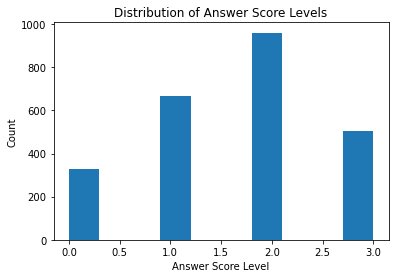

In [49]:
import matplotlib.pyplot as plt
plt.hist(fce_df.Answer_Score_Level)
plt.xlabel('Answer Score Level')
plt.ylabel('Count')
plt.title('Distribution of Answer Score Levels')
plt.show()

### Four Classes - Stastical Quarters

Property of the sample vs. property of the population.

In [50]:
# create a new categorical variable
fce_df["Answer_Score_Quarter"] = "Not_Assigned"

# assign the top quarter
fce_df.loc[fce_df["Answer_Score"] >= 4.2,
          ["Answer_Score_Quarter"]] = 0

# second quarter
fce_df.loc[(fce_df["Answer_Score"] < 4.2)
           & (fce_df["Answer_Score"] >= 3.3),
           "Answer_Score_Quarter"] = 1

# third quarter
fce_df.loc[(fce_df["Answer_Score"] < 3.3)
           & (fce_df["Answer_Score"] >= 3.1),
           "Answer_Score_Quarter"] = 2

# bottom quarter
fce_df.loc[fce_df["Answer_Score"] < 3.1,
           ["Answer_Score_Quarter"]] = 3

In [51]:
fce_df.Answer_Score_Quarter.value_counts()

0    736
2    619
1    597
3    505
Name: Answer_Score_Quarter, dtype: int64

## BOW Method for Word Uni and Bigrams

### Most Common Ngrams by Sum of Counts

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# create unigrams
vectorizer = CountVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(fce_df["PS_Stems"])
uni_word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# drop na
uni_word_df = uni_word_df.drop(uni_word_df[uni_word_df.isna().any(axis=1)].index).reset_index(drop=True)

# drop some weird characters
uni_word_df = uni_word_df.drop(["'", "''", ")", "*", ";", "``"], axis=1)

In [53]:
# create bigrams
fce_df["Joined_PS_Stems"] = fce_df.PS_Stems.apply(
    join_list) # join the ps stems list into a string

vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
X = vectorizer.fit_transform(fce_df["Joined_PS_Stems"])
bi_word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# drop na
bi_word_df = bi_word_df.drop(bi_word_df[bi_word_df.isna().any(axis=1)].index).reset_index(drop=True)

Now for both the unigram and bigram DataFrames I'm going to get the sum of each column so we can cut out the least common.

In [54]:
# create function to get sums from all columns in our ngram DataFrames
def get_sums(dataframe):
    sum_list = []
    for column in dataframe.columns:
        sum_list.append(dataframe["{}".format(column)].sum())
    return sum_list

# apply the function to both ngram DataFrames
uni_sums = get_sums(uni_word_df)
bi_sums = get_sums(bi_word_df)

# create new DataFrames to view the sums and columns
uni_sum_df = pd.DataFrame({"Unigram": uni_word_df.columns,
                         "Sum": uni_sums})

bi_sum_df = pd.DataFrame({"Bigram": bi_word_df.columns,
                         "Sum": bi_sums})

I *really* don't like all these contractions. They're getting treating as their own word, which makes sense, but they are also very common without much meaning since they're essentially stop words intertwined into other words. I'm going to cut out any "stems" that originate from a contraction.

In [55]:
# grab the column headers that contain an apostrophe
contraction_uni_headers = uni_sum_df[uni_sum_df.Unigram.str.contains("'")]
contraction_bi_headers = bi_sum_df[bi_sum_df.Bigram.str.contains("'")]

In [56]:
contraction_uni_headers

,Unigram,Sum
0,'a,1
1,'all,1
2,'anitkabir,2
3,'art,1
4,'bigmouth,1
...,...,...
3202,mc'donald,1
3431,n't,274
3558,o'clock,64
4720,smith'th,1


In [57]:
contraction_bi_headers

,Bigram,Sum


Kind of weird that the bigram DataFrame didn't have any apostrophes. I think it's in the way I used the CountVectorizer. For the bigram one I used analyzer="word" but for the unigram I used a method found on StackOverflow since the column I was extracting the unigrams from was a spacy object. Not going to look into it further for the purposes of this project.

In [58]:
# get rid of the contractions
uni_sum_df = uni_sum_df.drop(contraction_uni_headers.index)

I would say for each ngram DataFrame we want the 100 most common words since the number of features needs to be less than 2000 and I still have other to include. This is going to be a *very* small percentage for each.

In [59]:
# create DataFrames with the header names of those that
# do not fit the criteria of top common
top_common_uni = uni_sum_df[uni_sum_df.Sum > 600]
top_common_bi = bi_sum_df[bi_sum_df.Sum > 90]

not_common_uni = uni_sum_df[uni_sum_df.Sum <= 600]
not_common_bi = bi_sum_df[bi_sum_df.Sum <= 150]

# now we take the header names from the top common DataFrames
# and iterate through them to remove from from our original
# uni and bigram DataFrames

uni_to_remove = list(not_common_uni.Unigram)
bi_to_remove = list(not_common_bi.Bigram)

# remove non-common words
uni_word_df = uni_word_df.drop(uni_to_remove, axis=1)
bi_word_df = bi_word_df.drop(bi_to_remove, axis=1)

# also remove the contractions from the unigram DataFrame
uni_word_df = uni_word_df.drop(list(contraction_uni_headers.Unigram), axis=1)

In [60]:
uni_word_df

,activ,advertis,also,ask,chang,cloth,concert,could,day,dear,...,theatr,thing,think,time,us,use,want,would,write,year
0,0,0,0,1,0,0,0,0,0,1,...,0,0,2,1,0,2,0,3,0,1
1,0,4,2,0,0,0,0,0,0,1,...,3,1,1,0,0,0,0,0,0,0
2,1,0,2,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,4,1,0
3,0,0,1,0,2,0,0,1,0,1,...,3,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2453,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2454,0,0,1,0,3,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2455,0,0,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [61]:
bi_word_df

,alway enjoy,camp california,circl theatr,daili life,danni brook,dear kim,dear mr,dear sir,discount avail,fashion leisur,...,pop concert,restaur close,shop alway,show start,theatr restaur,travel juli,two week,unfortun pat,would like,would prefer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2454,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2455,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Most Weighted Ngrams by TF-IDF Mean

In [62]:
# apply tfidf to the joined porter stems
from sklearn.feature_extraction.text import TfidfVectorizer

# create DataFrames of uni and bigrams with their tf-idfs
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(fce_df["Joined_PS_Stems"])
uni_tfidf_word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

bi_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,2))
X_bi = bi_vectorizer.fit_transform(fce_df["Joined_PS_Stems"])
bi_tfidf_word_df = pd.DataFrame(X_bi.toarray(), columns=bi_vectorizer.get_feature_names())

In [63]:
# create function to get the average of all weights for each word tfidf
def get_means(dataframe):
    mean_list = []
    for column in dataframe.columns:
        mean_list.append(dataframe["{}".format(column)].mean())
    return mean_list

In [64]:
# apply the function to the ngram DataFrames
uni_tfidf_means_list = get_means(uni_tfidf_word_df)
bi_tfidf_means_list = get_means(bi_tfidf_word_df)

# create DataFrame from the list of uni tfidf means
uni_tfidf_means_df = pd.DataFrame({"Unigram": uni_tfidf_word_df.columns,
                                  "Mean": uni_tfidf_means_list})

bi_tfidf_means_df = pd.DataFrame({"Bigram": bi_tfidf_word_df.columns,
                                 "Mean": bi_tfidf_means_list})

# get the top 46 weighted unigrams
top_common_tfidf_uni_means_df = uni_tfidf_means_df[uni_tfidf_means_df.Mean > 0.0184]
not_top_common_tfidf_uni_means_df = uni_tfidf_means_df[uni_tfidf_means_df.Mean <= 0.0184]
tfidf_uni_to_remove = list(not_top_common_tfidf_uni_means_df.Unigram)
top_common_tfidf_uni_word_df = uni_tfidf_word_df.drop(tfidf_uni_to_remove, axis=1)

# get the top 46 weighted bigrams
top_common_tfidf_bi_means_df = bi_tfidf_means_df[bi_tfidf_means_df.Mean > 0.0035]
not_top_common_tfidf_bi_means_df = bi_tfidf_means_df[bi_tfidf_means_df.Mean <=0.0035]
tfidf_bi_to_remove = list(not_top_common_tfidf_bi_means_df.Bigram)
top_common_tfidf_bi_word_df = bi_tfidf_word_df.drop(tfidf_bi_to_remove, axis=1)

## BOW Method for Parts-of-Speech Uni, Bi, and Trigrams

### Most Common Ngrams by Sum of Counts

In [65]:
# create pos unigrams
vectorizer = CountVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(fce_df["POS_Tags"])
uni_pos_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# create pos bigrams
fce_df["Joined_POS_Tags"] = fce_df.POS_Tags.apply(
    join_list)

vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
X = vectorizer.fit_transform(fce_df["Joined_POS_Tags"])
bi_pos_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# create pos trigrams
vectorizer = CountVectorizer(analyzer='word', ngram_range=(3,3))
X = vectorizer.fit_transform(fce_df["Joined_POS_Tags"])
tri_pos_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [66]:
# apply the function to both ngram DataFrames
bi_pos_sums = get_sums(bi_pos_df)
tri_pos_sums = get_sums(tri_pos_df)

# create new DataFrames to view the sums and columns
bi_sum_df = pd.DataFrame({"Bigram": bi_pos_df.columns,
                         "Sum": bi_pos_sums})
tri_sum_df = pd.DataFrame({"Trigram": tri_pos_df.columns,
                         "Sum": tri_pos_sums})

# most common and not most common pos bigrams
top_common_bi_pos = bi_sum_df[bi_sum_df.Sum > 6000]
not_common_bi_pos = bi_sum_df[bi_sum_df.Sum <= 6000]

# create DataFrame of the most common pos trigrams
# and the not most common
top_common_tri_pos = tri_sum_df[tri_sum_df.Sum > 3000]
not_common_tri_pos = tri_sum_df[tri_sum_df.Sum <= 3000]

# create list to iterate through original bi and tri pos DataFrame and then remove
bi_pos_to_remove = list(not_common_bi_pos.Bigram)
tri_pos_to_remove = list(not_common_tri_pos.Trigram)
bi_pos_df = bi_pos_df.drop(bi_pos_to_remove, axis=1)
tri_pos_df = tri_pos_df.drop(tri_pos_to_remove, axis=1)

In [67]:
uni_pos_df

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,8,12,10,9,4,5,1,21,0,9,32,3,0,0,1,0,28,0
1,13,30,13,12,4,26,0,30,4,7,28,3,0,5,0,0,22,0
2,10,15,8,12,5,8,1,22,0,7,25,4,0,6,1,0,28,0
3,12,19,17,16,2,18,0,30,1,9,36,3,0,7,0,0,28,0
4,9,22,18,12,9,20,0,33,0,8,40,7,0,6,3,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,5,11,7,7,2,11,0,22,0,2,17,1,0,2,0,0,20,0
2453,16,18,8,16,8,17,1,37,1,5,21,0,0,2,1,0,22,0
2454,23,20,10,11,13,23,0,45,0,8,20,0,0,1,0,0,30,1
2455,16,20,17,8,6,20,0,47,0,8,13,0,0,5,1,0,21,0


In [68]:
bi_pos_df

,adj noun,adp det,adp noun,adp pron,adv pron,aux verb,det adj,det noun,noun adp,noun cconj,...,part verb,pron aux,pron noun,pron verb,sconj pron,verb adp,verb adv,verb det,verb part,verb pron
0,3,1,4,3,2,5,0,4,4,2,...,9,7,5,14,0,4,2,2,5,8
1,9,12,2,9,2,5,5,15,8,1,...,6,9,3,7,2,8,2,5,2,2
2,5,3,6,3,0,7,1,6,5,3,...,7,10,1,10,4,4,4,2,6,3
3,6,5,3,9,5,8,5,10,8,0,...,6,8,6,9,5,4,3,7,3,5
4,5,7,2,7,2,8,2,11,4,4,...,7,10,6,17,4,9,6,8,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,4,5,4,1,5,4,1,8,5,1,...,2,1,4,10,0,5,3,3,0,3
2453,11,6,1,6,3,11,4,9,7,6,...,5,6,6,4,0,5,2,2,3,5
2454,19,6,8,3,1,7,8,11,10,11,...,7,6,3,5,0,6,2,6,3,7
2455,11,9,8,1,2,4,8,9,9,4,...,6,0,1,7,2,3,4,5,0,3


In [69]:
tri_pos_df

,adp det noun,adp pron noun,adv pron verb,det adj noun,det noun adp,det noun pron,noun adp det,noun adp noun,noun pron aux,noun pron verb,part verb pron,pron aux verb,pron verb det,pron verb part,pron verb pron,verb adp det,verb det noun,verb part verb
0,1,2,2,0,2,2,1,1,4,5,3,4,0,4,4,0,2,5
1,8,3,1,4,4,3,5,0,1,3,0,4,0,1,2,4,4,2
2,3,1,0,1,2,3,1,1,5,5,0,6,1,2,1,1,1,6
3,3,4,3,4,2,3,2,2,3,1,0,4,3,1,2,1,3,3
4,5,4,2,2,1,1,0,0,2,7,2,6,3,2,0,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,4,0,5,0,0,2,4,1,0,3,0,0,1,0,3,1,3,0
2453,4,3,0,3,5,0,4,0,1,1,1,5,0,1,1,0,1,3
2454,4,1,1,8,4,0,4,4,3,1,0,3,1,0,3,1,4,3
2455,4,0,2,6,1,1,3,5,0,3,0,0,4,0,1,1,2,0


### Most Weighted Ngrams by TF-IDF Mean

In [70]:
# create DataFrames of pos uni, bi, and trigrams with their tf-idfs
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(fce_df["Joined_POS_Tags"])
uni_tfidf_pos_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

bi_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,2))
X_bi = bi_vectorizer.fit_transform(fce_df["Joined_POS_Tags"])
bi_tfidf_pos_df = pd.DataFrame(X_bi.toarray(), columns=bi_vectorizer.get_feature_names())

tri_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(3,3))
X_tri = tri_vectorizer.fit_transform(fce_df["Joined_POS_Tags"])
tri_tfidf_pos_df = pd.DataFrame(X_tri.toarray(), columns=tri_vectorizer.get_feature_names())

In [71]:
# create function to get the average of all weights for each word tfidf
def get_means(dataframe):
    mean_list = []
    for column in dataframe.columns:
        mean_list.append(dataframe["{}".format(column)].mean())
    return mean_list

In [72]:
# apply the function to the ngram DataFrames
pos_uni_tfidf_means_list = get_means(uni_tfidf_pos_df)
pos_bi_tfidf_means_list = get_means(bi_tfidf_pos_df)
pos_tri_tfidf_means_list = get_means(tri_tfidf_pos_df)

# create DataFrame from the list of uni tfidf means
pos_uni_tfidf_means_df = pd.DataFrame({"Unigram": uni_tfidf_pos_df.columns,
                                  "Mean": pos_uni_tfidf_means_list})

pos_bi_tfidf_means_df = pd.DataFrame({"Bigram": bi_tfidf_pos_df.columns,
                                 "Mean": pos_bi_tfidf_means_list})

pos_tri_tfidf_means_df = pd.DataFrame({"Trigram": tri_tfidf_pos_df.columns,
                                      "Mean": pos_tri_tfidf_means_list})

# get the top 14 weighted pos bigrams
top_common_tfidf_pos_bi_means_df = pos_bi_tfidf_means_df[pos_bi_tfidf_means_df.Mean > 0.1]
not_top_common_tfidf_pos_bi_means_df = pos_bi_tfidf_means_df[pos_bi_tfidf_means_df.Mean <=0.1]
tfidf_bi_pos_to_remove = list(not_top_common_tfidf_pos_bi_means_df.Bigram)
top_common_tfidf_bi_pos_df = bi_tfidf_pos_df.drop(tfidf_bi_pos_to_remove, axis=1)

# get the top weighted pos trigrams
top_common_tfidf_pos_tri_means_df = pos_tri_tfidf_means_df[pos_tri_tfidf_means_df.Mean > 0.05]
not_top_common_tfidf_pos_tri_means_df = pos_tri_tfidf_means_df[pos_tri_tfidf_means_df.Mean <= 0.05]
tfidf_tri_pos_to_remove = list(not_top_common_tfidf_pos_tri_means_df.Trigram)
top_common_tfidf_tri_pos_df = tri_tfidf_pos_df.drop(tfidf_tri_pos_to_remove, axis=1)

## Error Rate

In [73]:
fce_df["Error_Rate"] = fce_df.Number_of_Mistakes / fce_df.Number_of_Tokens

## Correction Codes Unigrams

In [74]:
# create correction code unigrams
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(fce_df["Correction_Codes"])
uni_correction_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Feature Sets and Models



Here I implement 2 different models that are differentiated by the target variable.

**Model 1:** Uses the original raw answer scores from the .xml files.

**Model 2:** Uses the answer score level. For example, 5.1, 5.2, and 5.3 and are all grouped into the same category, Level 5. Note that the lowest level includes 2.3 and below.

The regression model performed best when it used the parts-of-speech by total count feature set, whereas the classification models performed best when they used the tf-idf weighted pos feature set.

Overall, the highest-performing model was with Logistic Regression, with an Adjusted R-squared value of 0.48 on the test set.

**Note: Normalization and SMOTE are performed in this section as part of the final model preparation process.**

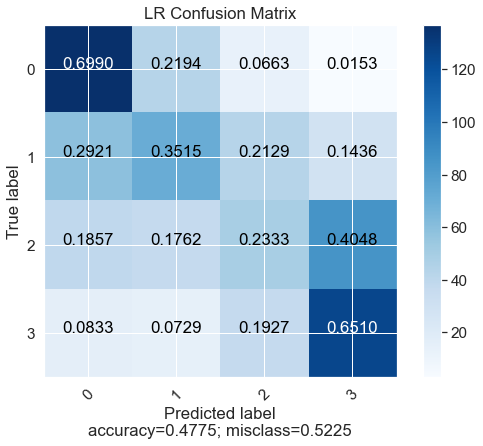

## Feature Sets

Various feature sets were created and processed through the models:

* Word uni/bigrams selected by total counts
* Word uni/bigrams with TF-IDF (those above a certain mean for corpus)
* Parts-of-Speech uni, bi, and trigrams
* Parts-of-Speech ngrams with TF-IDF (those above a certain mean for corpus)
* Correction code unigrams with TF-IDF
* Error Rate
* Number of tokens

In [75]:
# base model
# all model versions include the following variables
# error rate
# number of tokens
# all 3 target variable versions
base_model = pd.DataFrame(fce_df["Error_Rate"])
base_model = base_model.merge(fce_df["Number_of_Tokens"], left_index=True, right_index=True)
base_model = base_model.merge(fce_df["Answer_Score"], left_index=True, right_index=True)
base_model = base_model.merge(fce_df["Answer_Score_Level"], left_index=True, right_index=True)
base_model = base_model.merge(fce_df["Answer_Score_Quarter"], left_index=True, right_index=True)

In [334]:
# word uni and bigrams
word_ngrams = base_model.merge(uni_word_df, left_index=True, right_index=True)
word_ngrams = word_ngrams.merge(bi_word_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(word_ngrams.shape[1] - 0))

This feature set contains 101 variables.


In [335]:
# just the uni, bi, and trigram pos tags
pos_ngrams = base_model.merge(uni_pos_df, left_index=True, right_index=True)
pos_ngrams = pos_ngrams.merge(bi_pos_df, left_index=True, right_index=True)
pos_ngrams = pos_ngrams.merge(tri_pos_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(pos_ngrams.shape[1] - 0))

This feature set contains 62 variables.


In [336]:
# just the unigrams from the correction codes
correction_unigrams = base_model.merge(uni_correction_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(correction_unigrams.shape[1] - 0))

This feature set contains 80 variables.


In [337]:
# tfidf uni and bi grams of words
tfidf_word_ngrams = base_model.merge(top_common_tfidf_uni_word_df, left_index=True, right_index=True)
tfidf_word_ngrams = tfidf_word_ngrams.merge(top_common_tfidf_bi_word_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(tfidf_word_ngrams.shape[1] - 0))

This feature set contains 101 variables.


In [338]:
# tfidf uni, bi, and trigrams of pos
tfidf_pos_ngrams = base_model.merge(uni_tfidf_pos_df, left_index=True, right_index=True)
tfidf_pos_ngrams = tfidf_pos_ngrams.merge(top_common_tfidf_bi_pos_df, left_index=True, right_index=True)
tfidf_pos_ngrams = tfidf_pos_ngrams.merge(top_common_tfidf_tri_pos_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(tfidf_pos_ngrams.shape[1] - 0))

This feature set contains 46 variables.


In [339]:
# all of the features together (tfidf versions)
tfidf_feature_set = base_model.merge(top_common_tfidf_uni_word_df, left_index=True, right_index=True)
tfidf_feature_set = tfidf_feature_set.merge(top_common_tfidf_bi_word_df, left_index=True, right_index=True)
tfidf_feature_set = tfidf_feature_set.merge(uni_tfidf_pos_df, left_index=True, right_index=True)
tfidf_feature_set = tfidf_feature_set.merge(top_common_tfidf_bi_pos_df, left_index=True, right_index=True)
tfidf_feature_set = tfidf_feature_set.merge(top_common_tfidf_tri_pos_df, left_index=True, right_index=True)
print("This feature set contains {} variables.".format(tfidf_feature_set.shape[1] - 0))

This feature set contains 142 variables.


In [450]:
model_df = tfidf_pos_ngrams

In [451]:
model_df

,Error_Rate,Number_of_Tokens,Answer_Score,Answer_Score_Level,Answer_Score_Quarter,adj,adp,adv,aux,cconj,...,adp det noun,det adj noun,det noun adp,noun adp det,noun pron aux,noun pron verb,pron aux verb,pron verb pron,verb det noun,verb part verb
0,0.139860,143,2.3,3.0,3.0,0.151598,0.227397,0.189574,0.170547,0.076201,...,0.029383,0.000000,0.065531,0.034755,0.130954,0.160553,0.118445,0.149048,0.062505,0.159304
1,0.076142,197,3.2,2.0,2.0,0.196475,0.453405,0.196555,0.181362,0.060775,...,0.197223,0.105749,0.109963,0.145802,0.027468,0.080824,0.099378,0.062527,0.104885,0.053464
2,0.078947,152,4.3,1.0,0.0,0.194682,0.292023,0.155809,0.233619,0.097857,...,0.089301,0.031921,0.066387,0.035209,0.165831,0.162651,0.179990,0.037749,0.031661,0.193663
3,0.126263,198,4.3,1.0,0.0,0.178686,0.282920,0.253242,0.238248,0.029939,...,0.074947,0.107163,0.055717,0.059101,0.083506,0.027302,0.100707,0.063363,0.079716,0.081268
4,0.146018,226,3.2,2.0,2.0,0.116862,0.285662,0.233818,0.155816,0.117481,...,0.117807,0.050533,0.026274,0.000000,0.052504,0.180241,0.142467,0.000000,0.075181,0.102193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0.130841,107,3.2,2.0,2.0,0.126917,0.279218,0.177756,0.177684,0.051036,...,0.146461,0.000000,0.000000,0.173240,0.000000,0.120044,0.000000,0.139301,0.116835,0.000000
2453,0.075145,173,5.1,0.0,0.0,0.267057,0.300440,0.133583,0.267057,0.134237,...,0.100403,0.080752,0.139951,0.118760,0.027967,0.027431,0.126479,0.031831,0.026698,0.081652
2454,0.097561,205,3.3,2.0,1.0,0.317714,0.276273,0.138193,0.151950,0.180530,...,0.096715,0.207431,0.107849,0.114399,0.080820,0.026423,0.073100,0.091987,0.102869,0.078654
2455,0.093407,182,3.3,2.0,1.0,0.242342,0.302928,0.257593,0.121171,0.091360,...,0.097721,0.157191,0.027243,0.086691,0.000000,0.080095,0.000000,0.030981,0.051969,0.000000


In [425]:
model_df["Answer_Score_Level"] = model_df.Answer_Score_Level.astype(float)
model_df["Answer_Score_Quarter"] = model_df.Answer_Score_Quarter.astype(float)

In [426]:
temp_model = model_df.copy()
temp_model = temp_model.drop(["Answer_Score_Level",
                             "Answer_Score_Quarter"],
                            axis=1)

<AxesSubplot:>

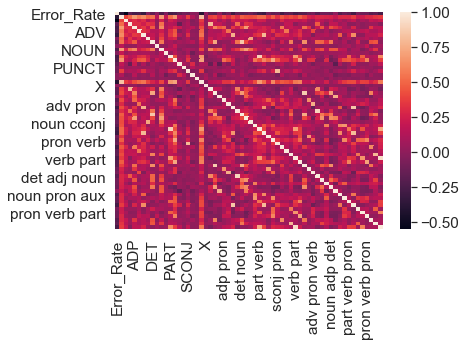

In [427]:
sns.heatmap(temp_model.corr())

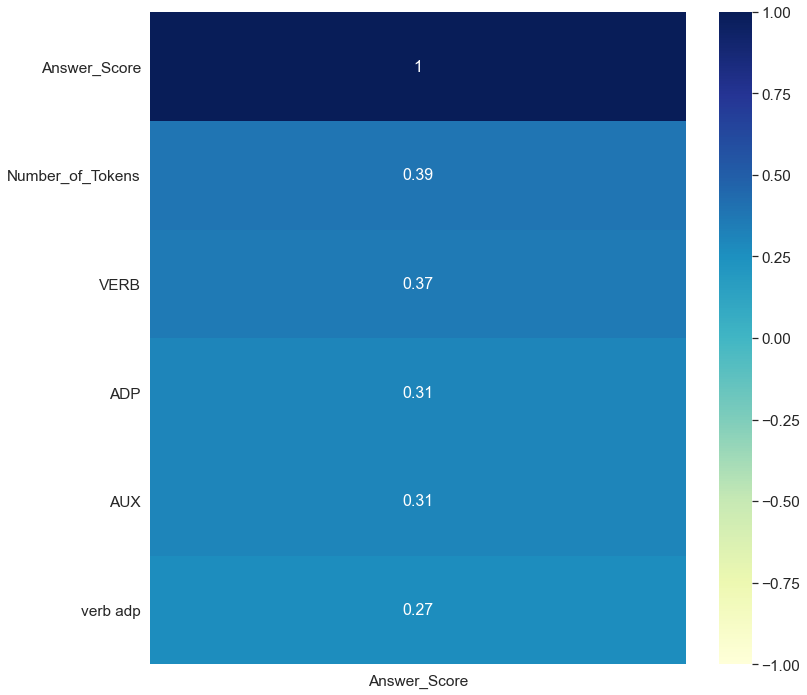

In [428]:
# correlations with the answer score target variable
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.4)
sns.heatmap(temp_model.corr()[["Answer_Score"]].sort_values("Answer_Score").tail(6),
           vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax, annot_kws={"size": 16});
ax.invert_yaxis()

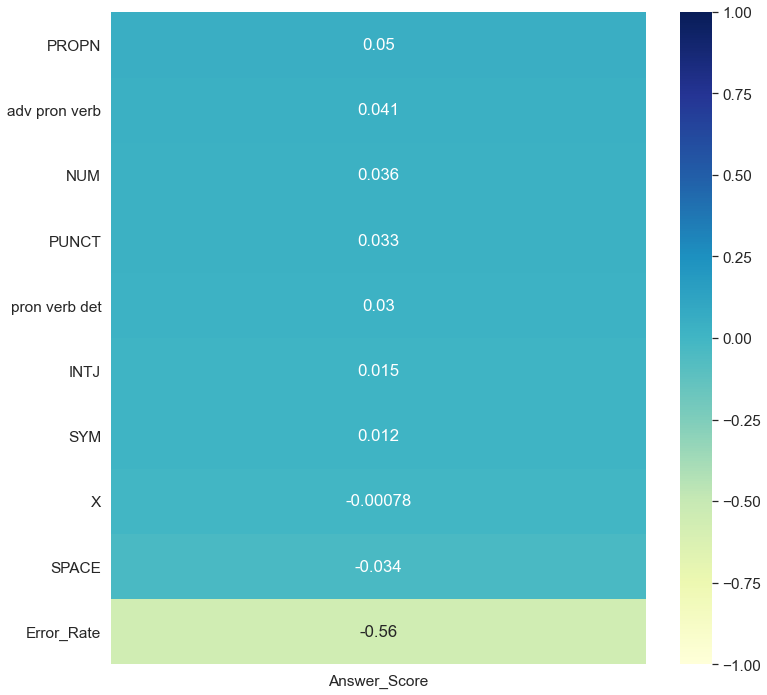

In [429]:
# negative correlations with the answer score target variable
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(temp_model.corr()[["Answer_Score"]].sort_values("Answer_Score").head(10),
           vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

## Raw Answer Score

**Linear Regression**

Uses the parts-of-speech by total count ngrams.

Training Set: 0.40
Test Set: 0.37

In [430]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


Y = model_df['Answer_Score']
X = np.array(model_df.drop(['Answer_Score',
                            'Answer_Score_Level',
                            'Answer_Score_Quarter'], 1))


In [431]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models

lr = LinearRegression()

lr.fit(X_train, y_train)

y_predicted = lr.predict(X_test)
mse = mean_squared_error(y_test, y_predicted, squared=True)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
mae = mean_absolute_error(y_test, y_predicted)
mape = mean_absolute_error(y_test, y_predicted)*100

print("----------------------Linear Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
print('Mean Squared Error:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

----------------------Linear Regression Scores----------------------
Training set score: 0.4012468030917008

Test set score: 0.374396123525908
Mean Squared Error: 0.5636348119655561
RMSE: 0.7507561601249477
MAE: 0.6042329807874708
MAPE: 60.42329807874708


In [432]:
model_df.drop(['Answer_Score',
                            'Answer_Score_Level',
                            'Answer_Score_Quarter'], 1)

,Error_Rate,Number_of_Tokens,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,...,noun pron aux,noun pron verb,part verb pron,pron aux verb,pron verb det,pron verb part,pron verb pron,verb adp det,verb det noun,verb part verb
0,0.139860,143,8,12,10,9,4,5,1,21,...,4,5,3,4,0,4,4,0,2,5
1,0.076142,197,13,30,13,12,4,26,0,30,...,1,3,0,4,0,1,2,4,4,2
2,0.078947,152,10,15,8,12,5,8,1,22,...,5,5,0,6,1,2,1,1,1,6
3,0.126263,198,12,19,17,16,2,18,0,30,...,3,1,0,4,3,1,2,1,3,3
4,0.146018,226,9,22,18,12,9,20,0,33,...,2,7,2,6,3,2,0,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0.130841,107,5,11,7,7,2,11,0,22,...,0,3,0,0,1,0,3,1,3,0
2453,0.075145,173,16,18,8,16,8,17,1,37,...,1,1,1,5,0,1,1,0,1,3
2454,0.097561,205,23,20,10,11,13,23,0,45,...,3,1,0,3,1,0,3,1,4,3
2455,0.093407,182,16,20,17,8,6,20,0,47,...,0,3,0,0,4,0,1,1,2,0


In [433]:
Y = model_df['Answer_Score']
X = np.array(model_df.drop(['Answer_Score',
                            'Answer_Score_Level',
                            'Answer_Score_Quarter'], 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=70)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_error(y_test, y_pred)*100

print(results.summary())
print('Mean Squared Error:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

                            OLS Regression Results                            
Dep. Variable:           Answer_Score   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     15.47
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.55e-112
Time:                        00:18:52   Log-Likelihood:                -1672.1
No. Observations:                1474   AIC:                             3462.
Df Residuals:                    1415   BIC:                             3775.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3317      0.119     27.915      0.0

## Answer Score Level

**Logistic Regression**

Uses the pos weighted by their tf-idf.

Training Set: 0.44

Test Set: 0.48

After normalizing the data, this adjusted R-squared valued dropped to 0.44 for the test set.

In [452]:
# when I modified the type earlier it added .0, getting rid for class purposes 1 vs 1.0
model_df["Answer_Score_Level"] = model_df["Answer_Score_Level"].astype(str).replace('\.0', '', regex=True)
model_df["Answer_Score_Level"].value_counts()

2    960
1    665
3    505
0    327
Name: Answer_Score_Level, dtype: int64

In [478]:
# some imports and preparing X/Y
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Y = model_df['Answer_Score_Level'].astype(str).replace('\.0', '', regex=True)
X = np.array(model_df.drop(['Answer_Score_Level', 'Answer_Score', 'Answer_Score_Quarter'], 1))

# normalize
from sklearn.preprocessing import normalize

X = normalize(X, axis=0)

Counter({'2': 960, '1': 665, '3': 505, '0': 327})


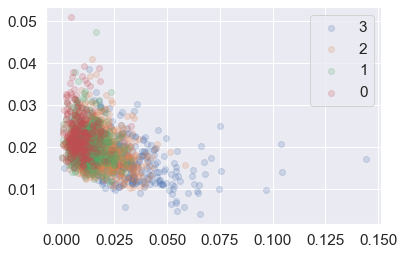

In [479]:
# checking out a scatter plot of the classes
import imblearn
from collections import Counter
counter = Counter(Y)
print(counter)

import matplotlib.pyplot as plt
from numpy import where

for label, _ in counter.items():
    row_ix = where(Y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.2)
plt.legend()
plt.show()

In [480]:
# transform using SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# implement both an oversampler and an undersampler
over = SMOTE(sampling_strategy={"0": 500,
                               "1": 665,
                               "2": 960,
                               "3": 505})
under = RandomUnderSampler(sampling_strategy={"0": 500,
                                             "1": 500,
                                             "2": 500,
                                             "3": 500})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# fit the samplers
X, Y = pipeline.fit_resample(X, Y)

Counter({'0': 500, '1': 500, '2': 500, '3': 500})


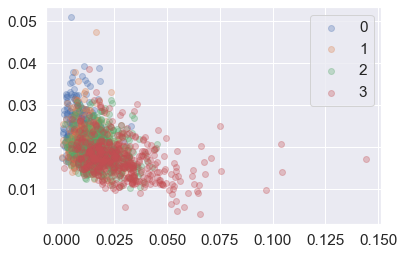

In [481]:
# check out the classes again
counter = Counter(Y)
print(counter)

for label, _ in counter.items():
    row_ix = where(Y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.3)
plt.legend()
plt.show()

In [482]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

In [483]:
# Models

lr = LogisticRegression(max_iter=5000)
rfc = RandomForestClassifier(n_estimators=300, max_depth=6)
svc = SVC()


lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svc.fit(X_train, y_train)


print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("\n")
print("----------------------RFC Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("\n")
print("----------------------SVC Scores----------------------")
print('Training set score:', svc.score(X_train, y_train))
print('\nTest set score:', svc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.44083333333333335

Test set score: 0.40125


----------------------RFC Scores----------------------
Training set score: 0.8708333333333333

Test set score: 0.47


----------------------SVC Scores----------------------
Training set score: 0.7683333333333333

Test set score: 0.45625


In [469]:
y_test.value_counts()

2    210
1    202
0    196
3    192
Name: Answer_Score_Level, dtype: int64

In [470]:
lr_pred_df = pd.DataFrame(lr.predict(X_test)).value_counts()
lr_pred_df

3    399
0    352
1     49
dtype: int64

In [471]:
rfc_pred_df = pd.DataFrame(rfc.predict(X_test)).value_counts()
rfc_pred_df

0    252
3    230
1    160
2    158
dtype: int64

In [391]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

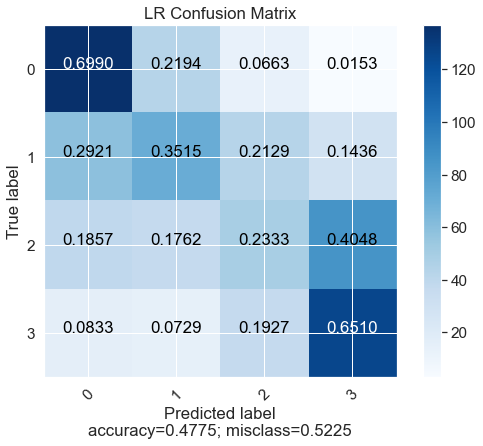

In [392]:
# there's a cell above that is hidden that has code for the confusion matrix
confusion = confusion_matrix(y_test, lr.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(4)], title='LR Confusion Matrix')

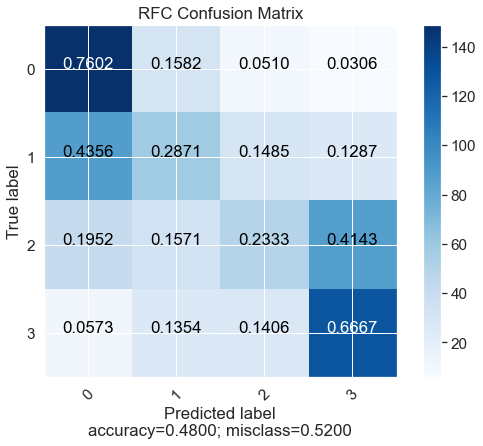

In [393]:
confusion = confusion_matrix(y_test, rfc.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(4)], title='RFC Confusion Matrix')

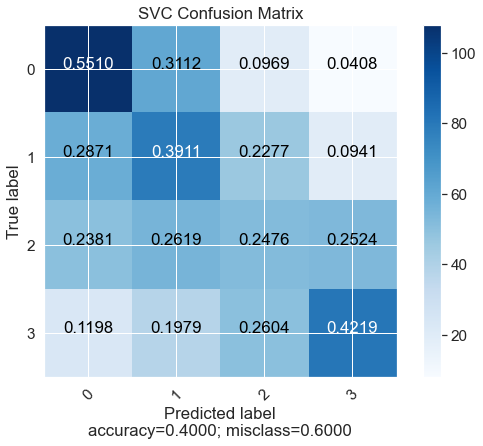

In [394]:
confusion = confusion_matrix(y_test, svc.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(4)], title='SVC Confusion Matrix')